# Project 2

# Preprocessing and Data Quality 


### Question 1 (Order cancellations)
Invoices with a InvoiceNo starting with the letter ‘c’ are order cancellations. Would you recommend keeping the order cancellation in your data set? Also provide a reason for your recommandation. 

Your explanation:
- As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. By looking at the list of cancelled invoices, there are no positive value for quantity where the invoice is prefixed with 'c'. There are 3836 unique orders that are cancelled out of total 25900 (Unique InvoiceNo).It is removing only 1.7% of total data. I recommend removing it since there are no specific analysis in the further questions based on cancellation data.

In [1]:
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import dateutil
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")


dataframe = pd.read_excel("OnlineRetail.xlsx")

#getting cancelled transactions with unique InvoiceNo.
cancelled_orders = dataframe[dataframe['InvoiceNo'].astype(str).str.contains('C')]
total_cancelled_orders =cancelled_orders['InvoiceNo'].nunique()
print(total_cancelled_orders)

3836


In [2]:
cancelled_orders.shape

(9288, 8)

In [3]:
#Number of total orders with unique InvoiceNo.
total_orders = dataframe['InvoiceNo'].nunique()
print(total_orders)

25900


In [4]:
#cancelled orders with quantity greater than 0
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [5]:
# Removing Cancelled Orders
dataframe_removed_cancelled_orders=dataframe[~dataframe.InvoiceNo.str.contains("C", na=False)]
print('Initial dataframe shape:',dataframe.shape)
print('After removal dataframe shape:',dataframe_removed_cancelled_orders.shape)

Initial dataframe shape: (541909, 8)
After removal dataframe shape: (532621, 8)


### Question 2 (Empty values)
The attributes Description and CustomerID contain empty values. The Country attribute contains an “unspecified” value. For each of the three attributes reason how you would handle these values and why. 

Your explanation:
- Description: Description missing values is not handled since Stockcode can be used to get the description and description is not used in Clustering and Frequent Item sets. 
- CustomerID: Missing values in CustomerID is not handled because the Clustering and Frequent Item sets are not based on the product bought. Removing all the missing values of CustomerID will also lead to a removal of 25% of data rows.
- Country: Replacing the unspecified with mode is suitable as 486732/532621 availible dataset has United Kingdom. So replacing 446 unspecified rows with United Kingdom will not change the dataset significantly 

In [6]:
dataframe_removed_cancelled_orders.info()

#preprocessing missing Country

unspecified =  dataframe_removed_cancelled_orders['Country']=="Unspecified"
unspecified_dataframe = dataframe_removed_cancelled_orders[unspecified]
print(unspecified_dataframe.shape) #number of entries with unspecified

country_mode = dataframe_removed_cancelled_orders['Country'].mode()[0]
dataframe_removed_cancelled_orders['Country'] = dataframe_removed_cancelled_orders['Country'].replace("Unspecified",country_mode)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      532621 non-null object
StockCode      532621 non-null object
Description    531167 non-null object
Quantity       532621 non-null int64
InvoiceDate    532621 non-null datetime64[ns]
UnitPrice      532621 non-null float64
CustomerID     397924 non-null float64
Country        532621 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB
(446, 8)


### Question 3 (Outliers/Noise)
Explore into the attributes Quantity and UnitPrice by plotting each attribute visually. Do these attributes contain noise and/or outliers? If so, reason how you would handle them and modify your data set accordingly.


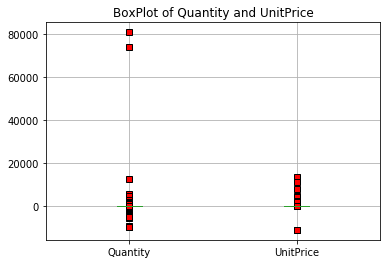

In [7]:
#Boxplotting the Quantity and UnitPrice
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('BoxPlot of Quantity and UnitPrice')
dataframe_removed_cancelled_orders.boxplot(column=["Quantity","UnitPrice"],flierprops=red_square) 
plt.show()

In [8]:
# #Method to Remove Outliers in quantity and unitprice

datafram_outliers_removed=dataframe_removed_cancelled_orders


def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

data_filtered_quantity = remove_outlier(datafram_outliers_removed,'Quantity')

dataframe_outliers_removed = remove_outlier(data_filtered_quantity,'UnitPrice')

dataframe_outliers_removed.shape

(438509, 8)

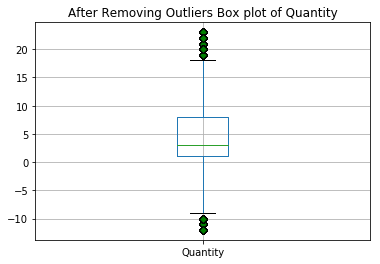

In [9]:
fig5, ax5 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax5.set_title('After Removing Outliers Box plot of Quantity')
dataframe_outliers_removed.boxplot(column=["Quantity"],flierprops=green_diamond)
plt.show()

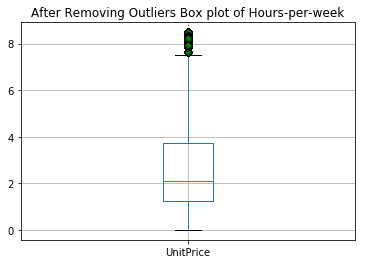

In [10]:
fig5, ax5 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax5.set_title('After Removing Outliers Box plot of Hours-per-week')
dataframe_outliers_removed.boxplot(column=["UnitPrice"],flierprops=green_diamond)
plt.show()

Removal of rows with negative quantity

Note: Found while exporing data, the above dataset has quantity in negative. Together with that both CustomerID, UnitPrice are unavailible. Description is availible for partial dataset. So it is clear that the dataset does not represent purchases. So, I plan to remove them also.

In [11]:
# dataset with negative quantity
print(dataframe_outliers_removed[dataframe_outliers_removed["Quantity"] < 0])

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
2406      536589     21777         NaN       -10 2010-12-01 16:50:00   
7190      536998     85067         NaN        -6 2010-12-03 15:30:00   
7193      537001     21653         NaN        -6 2010-12-03 15:33:00   
7195      537003     85126         NaN        -2 2010-12-03 15:33:00   
7203      537011     22139         NaN        -5 2010-12-03 15:38:00   
7204      537012     21535         NaN       -12 2010-12-03 15:39:00   
7210      537018    84562A         NaN        -3 2010-12-03 15:42:00   
7293      537029     37476         NaN        -6 2010-12-03 16:37:00   
14062     537451     84881         NaN       -11 2010-12-07 09:27:00   
17158     537687     84840         NaN        -9 2010-12-08 10:26:00   
20393     538042     21763         NaN        -4 2010-12-09 13:10:00   
20394     538043     22833         NaN        -1 2010-12-09 13:10:00   
31226     538906     21895         NaN        -5 2010-12-15 10:3

In [12]:
#remove negative quantity
negative_quantity = np.where(dataframe_outliers_removed["Quantity"] < 0)
negative_quantity = list(negative_quantity[0])
dataframe_outliers_removed.drop(dataframe_outliers_removed.index[negative_quantity], inplace = True)

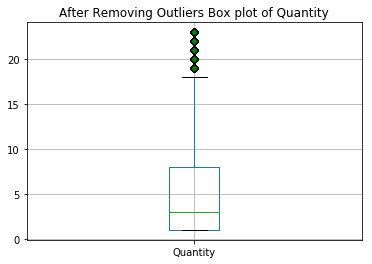

In [13]:
fig5, ax5 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax5.set_title('After Removing Outliers Box plot of Quantity')
dataframe_outliers_removed.boxplot(column=["Quantity"],flierprops=green_diamond)
plt.show()

Your explanation:
- After plotting a boxplot, it is certain that there are outliers in both Quantity and UnitPrice. The outliers are removed based on IQR method and plotted subsequently are the boxplots of the two. 
- It can be observed that the quantity contains negative values. After exploring the dataset, together with that both CustomerID, UnitPrice are unavailible. Description is availible for partial dataset. So it is clear that the dataset does not represent purchases.Therefore it is also removed.

# Visualization

### Question 4 (Stream graph)
Create a stream graph that visualizes the number  of purchases (invoices) per country over time.

4.(a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland.

In [14]:
dataframe_for_stream_graph=dataframe_outliers_removed
dataframe_for_stream_graph=dataframe_for_stream_graph.loc[dataframe_for_stream_graph['Country'].isin(['Belgium','EIRE','France','Netherlands','Germany','Norway','Portugal','Spain','Switzerland'])]

4.(b) Modify the data set such that it shows per month for each country how many purchases were made (i.e. how many invoices were created).

In [15]:

dataframe_for_stream_graph['InvoiceDate'] = pd.to_datetime(dataframe_for_stream_graph['InvoiceDate'], errors='coerce')
    
dataframe_for_stream_graph['InvoiceDate'] = dataframe_for_stream_graph['InvoiceDate'].dt.strftime('%Y-%m')

df_groupby = dataframe_for_stream_graph.groupby(['Country','InvoiceDate']).size()

df_groupby = df_groupby.to_frame().reset_index()

df_groupby.columns = ['Country', 'InvoiceDate', 'Frequency']

country_list=['Belgium',' EIRE', 'France', 'Netherlands', 'Germany','Norway','Portugal','Spain','Switzerland']

4.(c) Use the modified data to create a stream graph. 

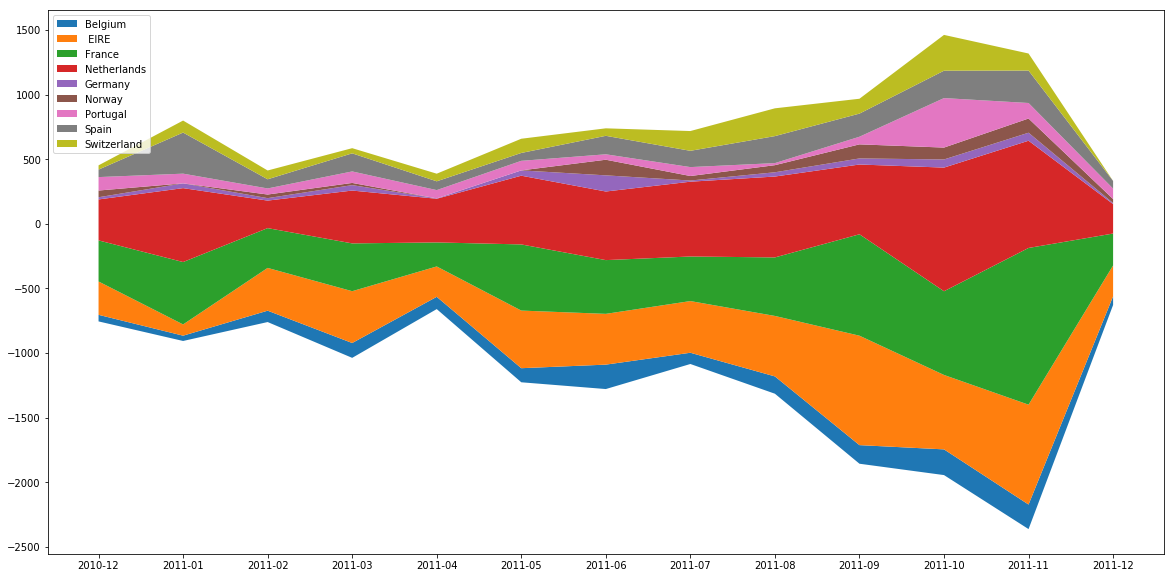

In [16]:
invoiceDate = df_groupby['InvoiceDate'].unique().tolist()

Belgium, EIRE, France, Germany, Netherlands, Norway, Portugal, Spain, Switzerland = ([] for i in range(9))

for i in range(0, len(df_groupby)):
    if(df_groupby['Country'][i] == "Belgium"):
        Belgium.append(df_groupby['Frequency'][i])
    
    if(df_groupby['Country'][i] == "EIRE"):
        EIRE.append(df_groupby['Frequency'][i])
        
    if(df_groupby['Country'][i] == "France"):
        France.append(df_groupby['Frequency'][i])
    
    if(df_groupby['Country'][i] == "Germany"):
        Germany.append(df_groupby['Frequency'][i])
        
    if(df_groupby['Country'][i] == "Netherlands"):
        Netherlands.append(df_groupby['Frequency'][i])
        
    if(df_groupby['Country'][i] == "Norway"):
        Norway.append(df_groupby['Frequency'][i])
        
    if(df_groupby['Country'][i] == "Portugal"):
        Portugal.append(df_groupby['Frequency'][i])
        
    if(df_groupby['Country'][i] == "Spain"):
        Spain.append(df_groupby['Frequency'][i])
        
    if(df_groupby['Country'][i] == "Switzerland"):
        Switzerland.append(df_groupby['Frequency'][i])
    
Norway.insert(1, 0)
Norway.insert(4, 0)
Norway.insert(5, 0)
Switzerland.append(0)


#stacking our values vertically
y = np.vstack(country_list)

#print(country_list)

fig, ax = plt.subplots(figsize=(20, 10))
#modifying the axis
ax.stackplot(invoiceDate, Belgium, EIRE, France, Germany, Netherlands, Norway, Portugal, Spain, Switzerland, labels=country_list,baseline='wiggle')
ax.legend(loc='upper left')
plt.show()

4.(d) Use this graph to compare the purchases made by each country. Can you find
interesting differences between the countries? Are there certain times were the
sales were particularly high/ particularly low?

- Belgium: Purchases made in Belgium in the period shows a downward trend overall. There was an rise in purchases in months 02-2011,04-2011,07-2011.There was an drop in purchases in months 01-2011,03-2011,11-2011. The purchases dropped very low in the month 11-2011 and then a step rise in purchases can be observed in 12-2011.
- EIRE: Purchases made in EIRE in the period shows a downward trend overall. There was an rise in purchases in months 02-2011,04-2011,07-2011.There was an drop in purchases in months 01-2011,03-2011,11-2011. The purchases dropped very low in the month 11-2011 and then a step rise in purchases can be observed in 12-2011.
- France: Purchases made in France in the period shows a downward trend overall. There was an rise in purchases in months 02-2011,04-2011,09-2011.There was an drop in purchases in months 01-2011,03-2011,11-2011. The purchases dropped very low in the month 11-2011 and then a step rise in purchases can be observed in 12-2011.
- Netherlands: Purchases made in Netherlands in the period shows a constant trend overall. There was an rise in purchases in months 05-2011.There was an drop in purchases in months 01-2011,09-2011. The purchases dropped very low in the month 10-2011 and then a step rise in purchases can be observed in 11-2011.
- Germany: Purchases made in Germany in the period shows a constant trend overall. There was an rise in purchases in months 01-2011,03-2011,05-2011.There was an drop in purchases in months 02-2011,06-2011. The purchases rose high in the month 11-2011 and then a steep drop in purchases can be observed in 12-2011.
- Norway:Purchases made in Norway in the period shows a constant-growing trend overall. The purchases rose high in the month 11-2011 and then a steep drop in purchases can be observed in 12-2011.
- Portugal:Purchases made in Portugal in the period shows a constant-growing trend overall.There was a rise in purchases in the months 10-2011 and 11-2011 and then a step drop in purchases can be observed in 12-2011.
- Spain:Purchases made in Spain in the period shows a growth trend overall. There was an rise in purchases in months 01-2011,03-2011,06-2011,10-2011,11-2011.The purchases dropped, steep decrease in purchases can be observed in 12-2011.
- Switzerland:Purchases made in Switzerland in the period shows a growth trend overall. There was an rise in purchases in months 01-2011,03-2011,06-2011,10-2011,11-2011.Then a steep drop in purchases can be observed in 12-2011.

### <B> Overall trends:<B>
    - France, EIRE and Belgium have similar trends. The purchases are on the decreasing trend in all three countries. They  have all decreasing purchases in months of January, March and November. In December 2011 a steep rise is seen.
   
    -Netherlands, Germany,Norway have a constant trend. November 2011 is having steep rise and then a drop in purchase can    be observed in Dec 2011
    
    -Portugal,Spain and Netherlands have growth trend throughout the year. Steep growth can be seen during the November 2011 and then a steep decrease is seen by December 2011


### Question 5 (Heat map)
Create a heat map that visualizes how much (in sterling) each country purchases per month. 

5.(a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland. (Or use the version of the data set that you created for question 4 a).

In [17]:
dataframe_for_stream_graph2=dataframe_outliers_removed

dataframe_for_stream_graph2=dataframe_for_stream_graph2.loc[dataframe_for_stream_graph2['Country'].isin(['Belgium','EIRE','France','Netherlands','Germany','Norway','Portugal','Spain','Switzerland'])]


5.(b) Modify the data set such that it shows per month how much money (in sterling) was spent in the shop per country.

In [18]:
dataframe_for_stream_graph['InvoiceDate'] = pd.to_datetime(dataframe_for_stream_graph['InvoiceDate'], errors='coerce')
    
dataframe_for_stream_graph['InvoiceDate'] = dataframe_for_stream_graph['InvoiceDate'].dt.strftime('%Y-%m')

df_groupby = dataframe_for_stream_graph.groupby(['Country','InvoiceDate']).size()

df_groupby = df_groupby.to_frame().reset_index()

df_groupby.columns = ['Country', 'InvoiceDate', 'Frequency']


df_groupby1= dataframe_for_stream_graph.groupby(['Country', 'InvoiceDate'])['UnitPrice'].sum()

df_groupby1 = df_groupby1.to_frame().reset_index()

df_groupby1.columns = ['Country', 'InvoiceDate', 'UnitPrice']


df_groupby['UnitPrice']=df_groupby1['UnitPrice']

df_groupby['Sales']=df_groupby['Frequency']*df_groupby1['UnitPrice']


5.(c) Use the modified data to create a heat map. 

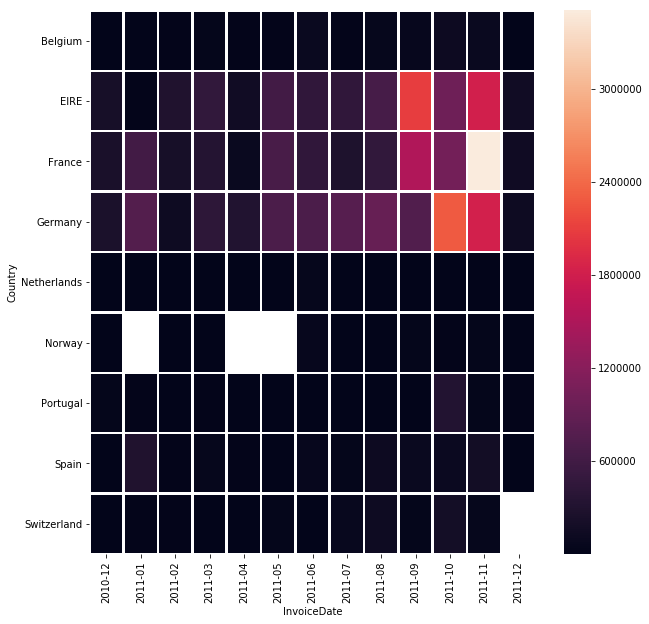

In [19]:
f, ax = plt.subplots(figsize=(10, 10))
pivotted=df_groupby.pivot('Country','InvoiceDate','Sales')
sns.heatmap(pivotted,linewidths=1.5, ax=ax)

5.(d) Compare the amount of the purchases over time and between each country. 

- Belgium: The amount purchased in Belgium during the period on average is less than 600k sterlings. 

- EIRE: The amount of purchased in EIRE during the period on average is between 300k-6M. Months September,October, November has seen the highest purchase amounts.

- France: The amount of purchased in France during the period on average is between 600k-1.8M. Months September,October, November has seen the highest purchase amounts.

- Netherlands: The amount of purchased in Netherlands during the period on average is less than 600k 

- Germany: The amount of purchased in Germany during the period is increasing every month from Dec 2010(from 600k-2.4M). A low amount is seen in Dec 2011. 

- Norway:The amount of purchased in Norway during the period on average is less than 600K 

- Portugal:The amount of purchased in Netherlands during the period on average is less than 600k.

- Spain:The amount of purchased in Spain ranges 600K-1.2M.

- Switzerland:The amount of purchased in Switzerland ranges 0-600k.



### Question 6 (Interpretation)
Compare the results obtained from the stream graph and the heat map. Is there a relation between the number of purchases and the amount purchased in sterling?


- There is no definite relationship between purchases and the amount purchased in sterling.
- Countries such as Germany,Norway,Spain with the increase in number of purchases there is an increase in amount
- Countries Belgium, Netherlands,Portugal,Switzerland have almost constant amount spent even with increase or decrease in purchases
- Countries EIRE,France has shown higher amount purchased even with lower number of purchases

# Clustering
Presume that the business analyst would like to cluster transactions with similar types of products into the same group (here don’t consider the quantity of the products). For each product, only use its ‘StockCode’ to represent it. All the results here should be based on the preprocessed data set obtained from question 1 to 3 of this assignment. Presume that this obtained data set from question 1 to 3 has a variable name ‘cluster_dataset’ and is expressed by Pandas DataFrame in your code.

### Question 7 (Data transformation and clustering)
7.(a) Calculate and show the number of occurrences of each product in data set   ‘cluster_dataset’. For example, if a product appears in a transaction, then its occurrence number will be increased by 1 (do not consider the quantity of this product here). Preserve the 100 most frequent products and remove all the other products in ‘cluster_dataset’. For example, if a row in ‘cluster_dataset’ contains unqualified product, then remove this row from ‘cluster_dataset’. Show the new ‘cluster_dataset’ in your result.


In [20]:
cluster_dataset=dataframe_outliers_removed

to_sort=cluster_dataset['StockCode'].value_counts().to_dict()

to_be_removed=list(to_sort.keys())[101:]

cluster_dataset = cluster_dataset[~cluster_dataset['StockCode'].isin(to_be_removed)]

cluster_dataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
17,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom


7.(b) Based on question a, please reorganize the data from ‘cluster_dataset’ and generate a new data set ‘cluster_dataset_new’ which has a suitable format (for k-means) for solving the transaction clustering problem mentioned above. Show the data from ‘cluster_dataset_new’ by using Pandas DataFrame in your result, where the index should be consistent with the values of 'InvoiceNo', the column name should be consistent with the values of 'StockCode' and each element in this DataFrame should have a value 0 or 1.

In [21]:
cluster_dataset.StockCode = cluster_dataset.StockCode.astype(str)

cluster_dataset_new = pd.crosstab(cluster_dataset.InvoiceNo, cluster_dataset.StockCode)

cluster_dataset_new.head()

StockCode,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,82583,84378,84380,84879,84946,85099B,85099C,85099F,85123A,85152
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


7.(c) Try values 2, 3, 4, 5 for parameter 'n_clusters' for the k-means function from Scikit-Learn over the data set ‘cluster_dataset_new’ generated in question b. Show the ‘within cluster variation’ (also called ‘sum of squared distances’) of the generated clusters for each different setting for ‘n_clusters’ in your result. Also write down the value that you have tried for setting 'n_clusters' which can help generate the best clustering results and explain how you make this decision.

k: 2  Inertia: 79973.55909271068
Mean euclidean distances: 0.9272201988285486


k: 3  Inertia: 77739.17802918644
Mean euclidean distances: 1.4108106459869036


k: 4  Inertia: 75903.60173950238
Mean euclidean distances: 1.7464549897400605


k: 5  Inertia: 74515.68672767424
Mean euclidean distances: 1.7920839754413749




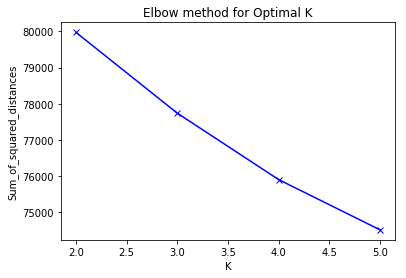

In [28]:
import collections
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import pairwise_distances
from scipy.sparse import lil_matrix
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from scipy.sparse import csr_matrix

dataframe_collection = {} 

sum_of_square_distance_array = []

for k in range (2, 6):
    
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(cluster_dataset_new)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    sum_of_square_distance_array.append(interia)
    print ("k:",k, " Inertia:", interia)
    centroids = kmeans_model.cluster_centers_
    dists = euclidean_distances(centroids)
    print ("Mean euclidean distances:", dists.mean())
    cluster_map = pd.DataFrame()
    cluster_map['data_index'] = cluster_dataset_new.index.values
    cluster_map['cluster'] = labels
    dataframe_collection[k] = cluster_map
    print ("\n")
    
K = range(2,6)
plt.plot(K, sum_of_square_distance_array, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for Optimal K')
plt.show()

Your explanation:
- From the plotted graph of sum of squared distances vs K, it can be observed that, the value of inertia decreases as the number of clusters increase.
- I am choosing 4 as my optimal K since from the plotted graph, the elbow point in the inertia graph is a good choice because after that the change in the value of inertia isn’t significant. (If the plot looks like an arm, then the elbow on the arm is optimal k.)

# Frequent Itemsets and Association Rules
 For the clusters output by k-means function with the best 'n_clusters' from question 7, the business analyst now would like to research on the frequent purchase behaviours and specific purchase rules for each cluster.
### Question 8 (Data transformation and mining frequent itemsets and association rules)
8.(a) Set the minimum support for finding the frequent purchase behaviours to 0.2. Please provide the business analyst with the qualified purchase behaviours. For each product, only use its ‘StockCode’ to represent it. Also show the data set prepared for each cluster for mining the frequent behaviours by using Pandas DataFrame in your result, the data set for the cluster k should have the variable name 'fpb_data_k' in your code.

8.(b) Furthermore, the business analyst would like to analyze the purchase behaviour of the citizens from ‘United Kingdom’ for each cluster. Specifically speaking, he wants to discover if there exist some rules which indicate that the citizens from ‘United Kingdom’ tend to buy some specific products for each cluster. Set the minimum support to 0.2, minimum confidence to 0.7. Please discover and show such rules (only show the rules with ‘United Kingdom’ appearing in antecedents in the rules) for each cluster for the business analyst. Also show the data sets prepared for each cluster for mining the relevant rules by using Pandas DataFrame in you result, the data set for cluster k should have the variable name 'r_data_k' in your code.

In [61]:
# your code

# Text Mining
### Question 12 (Model based on binary document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk.data
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import numpy as np

text_train = pd.read_csv("pg_train.csv",sep='delimiter',header=None)
text_test=pd.read_csv("pg_test.csv",sep='delimiter',header=None)

#Removing '#' and making columns
text_train = text_train.rename(columns={text_train.columns[0]: "colname"})
text_train = text_train.colname.str.split("#", expand=True)


text_train.rename(columns={ text_train.columns[0]: "target" }, inplace = True)
text_train.rename(columns={ text_train.columns[1]: "text" }, inplace = True)

#Converting to lower case
text_lower_case=text_train["text"][:].str.lower().to_frame()
text_train["text"]=text_lower_case["text"]

# Remove punctuation 
text_train["text"]=text_train["text"].str.replace('[{}]'.format(string.punctuation), '')


#tokenizer
text_train["text"] = text_train.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


#Stemming
stemmer = SnowballStemmer("english", ignore_stopwords=True)
text_train["text"] = text_train["text"].apply(lambda x: [stemmer.stem(y) for y in x])


#Stopword removal
stoplist = set(stopwords.words('english'))
text_train["text"]=text_train["text"].apply(lambda x: [item for item in x if item not in stoplist])

#Document Matrix
vect = CountVectorizer(tokenizer=lambda doc:doc, analyzer='word',binary=True,lowercase=False)
document_term_matrix=vect.fit_transform(text_train.text,y=None)

text_classification_binary = Pipeline([('vect', vect), ('logistic', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter = 30, random_state = 42))])
text_classification_binary = text_classification_binary.fit(text_train.text, text_train.target)


### Question 13 (Model based on document-term matrix of counts)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier.


In [63]:
#Document Matrix
vect = CountVectorizer(tokenizer=lambda doc:doc, analyzer='word',binary=False,lowercase=False)
document_term_matrix=vect.fit_transform(text_train.text,y=None)


text_classification = Pipeline([('vect', vect), ('logistic', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter = 30, random_state = 42))])
text_classification = text_classification.fit(text_train.text, text_train.target)


### Question 14 (Model based on tf-idf document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [64]:
from sklearn.feature_extraction.text import TfidfTransformer

vect = CountVectorizer(tokenizer=lambda doc:doc, analyzer='word',binary=False,lowercase=False)
document_term_matrix=vect.fit_transform(text_train.text,y=None)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(document_term_matrix)


from sklearn.linear_model import SGDClassifier

text_clf = Pipeline([('vect', vect), ('tf-idf', TfidfTransformer()), ('Logistic', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=30, random_state=42))])

text_clf = text_clf.fit(text_train.text, text_train.target)



### Question 15 (Model based on doc2vec)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier.


In [65]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from bs4 import BeautifulSoup

import multiprocessing
cores = multiprocessing.cpu_count()

df_train = pd.read_csv("pg_train.csv",sep='delimiter',header=None)
df_test=pd.read_csv("pg_test.csv",sep='delimiter',header=None)

df_train = df_train.rename(columns={df_train.columns[0]: "colname"})
df_train = df_train.colname.str.split("#", expand=True)

df_test = df_test.rename(columns={df_test.columns[0]: "colname"})
df_test = df_test.colname.str.split("#", expand=True)

df_train.rename(columns={ df_train.columns[0]: "target" }, inplace = True)
df_train.rename(columns={ df_train.columns[1]: "text" }, inplace = True)
df_train = df_train[pd.notnull(df_train['text'])]

df_test.rename(columns={ df_test.columns[0]: "target" }, inplace = True)
df_test.rename(columns={ df_test.columns[1]: "text" }, inplace = True)
df_test = df_test[pd.notnull(df_test['text'])]


df_train.index = range(4499)
df_train['text'].apply(lambda x: len(x.split(' '))).sum() #572257 words

df_train.index = range(4499)
df_train['text'].apply(lambda x: len(x.split(' '))).sum() #572257 words


572257

In [66]:
#Text Preprocessing
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df_train['text'] = df_train['text'].apply(cleanText)
df_test['text'] = df_test['text'].apply(cleanText)

In [67]:
#Stopword removal and tokenize
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

#creating tagged document for Doc2vec
train_tagged = df_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.target]), axis=1)
test_tagged = df_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.target]), axis=1)

In [68]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])


100%|██████████████████████████████████████████████████████████████████████████| 4499/4499 [00:00<00:00, 900638.30it/s]


In [69]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████████████████████████████████████████████████████████████████████| 4499/4499 [00:00<00:00, 900380.46it/s]


In [86]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [87]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### Question 16 (Evaluation)
16.(a) Predict the classification with the four models on the test data.


In [88]:
#Preprocessing Text data
text_test=pd.read_csv("pg_test.csv",sep='delimiter',header=None)

#Removing '#' and making columns
text_test = text_test.rename(columns={text_test.columns[0]: "colname"})
text_test = text_test.colname.str.split("#", expand=True)
text_test.rename(columns={ text_test.columns[0]: "target" }, inplace = True)
text_test.rename(columns={ text_test.columns[1]: "text" }, inplace = True)
#Converting to lower case
text_lower_case=text_test["text"][:].str.lower().to_frame()
text_test["text"]=text_lower_case["text"]
# Remove punctuation 
text_test["text"]=text_test["text"].str.replace('[{}]'.format(string.punctuation), '')
#tokenizer
text_test["text"] = text_test.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
#Stemming
stemmer = SnowballStemmer("english", ignore_stopwords=True)
text_test["text"] = text_test["text"].apply(lambda x: [stemmer.stem(y) for y in x])
#Stopword removal
stoplist = set(stopwords.words('english'))
text_test["text"]=text_test["text"].apply(lambda x: [item for item in x if item not in stoplist])

In [89]:
#Predicted classification on Model based on binary document-term matrix
predicted= text_classification_binary.predict(text_test.text)
np.mean(predicted == text_test.target)

0.9827242524916944

In [90]:
#Predicted classification on Model based on document-term matrix of counts
predicted1= text_classification.predict(text_test.text)
np.mean(predicted1== text_test.target)

0.9720930232558139

In [91]:
#Predicted classification on Model based on tf-idf
predicted2 =text_clf.predict(text_test.text)
np.mean(predicted2== text_test.target)

0.987375415282392

In [92]:
#Predicted classification on Model based on doc2vec
y_pred = logreg.predict(X_test)
np.mean(y_pred== df_test.target)

0.7089700996677741

16.(b) Obtain confusion matrices for the four different models.


In [77]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [78]:
# #Confusion Matrix on Model based on binary document-term matrix
cm1 = confusion_matrix(text_test.target, predicted)
print(cm1)

[[680   7   2]
 [ 12 498   5]
 [  0   0 301]]


In [79]:
#Confusion Matrix on Model based on document-term matrix of counts
cm2 = confusion_matrix(text_test.target, predicted1)
print(cm2)

[[673  11   5]
 [ 17 492   6]
 [  1   2 298]]


In [80]:
#Confusion Matrix on Model based on tf-idf
cm3 = confusion_matrix(text_test.target, predicted2)
print(cm3)

[[680   9   0]
 [  6 507   2]
 [  0   2 299]]


In [81]:
#Confusion Matrix on Model based on doc2vec
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[564 117   8]
 [273 231  11]
 [ 11   8 282]]


16.(c) Obtain accuracy and f1 score for the four different models.


In [82]:
# Accuracy and F1 score of Model based on binary document-term matrix
print('Testing accuracy %s' % accuracy_score(text_test.target, predicted))
print('Testing F1 score: {}'.format(f1_score(text_test.target, predicted, average='weighted')))

Testing accuracy 0.9827242524916944
Testing F1 score: 0.9826879683618106


In [83]:
#Accuracy and F1 score of Model based on document-term matrix of counts
print('Testing accuracy %s' % accuracy_score(text_test.target, predicted1))
print('Testing F1 score: {}'.format(f1_score(text_test.target, predicted1, average='weighted')))

Testing accuracy 0.9720930232558139
Testing F1 score: 0.9720531364595433


In [84]:
#Accuracy and F1 score of Model based on tf-idf
print('Testing accuracy %s' % accuracy_score(text_test.target, predicted2))
print('Testing F1 score: {}'.format(f1_score(text_test.target, predicted2, average='weighted')))

Testing accuracy 0.987375415282392
Testing F1 score: 0.9873828743579076


In [85]:
#Accuracy and F1 Score of Model based on doc2vec
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7156146179401993
Testing F1 score: 0.7048664079340687


16.(d) Briefly comment on the quality of the predictions for the four models.

_Your comment:_
- TF-IDF, Document-term matrix of counts and Binary Document-term matrix perform much better than doc2vec. All three of these models are able to predict the author based on text with an accuracy greater than 97%.
- Among them TF-IDF based model performs best and displays best metrics such as accuracy and F1 scores.


# Process Mining
For this part, refer to the online docs of pm4py. You will find particularly of interest the documentation on filtering (https://pm4py.github.io/filtering.html, or on the new website http://pm4py.pads.rwth-aachen.de/documentation/filtering-logs/). 
important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade` from any terminal emulator on Windows  (command prompt, PowerShell, etc) or any terminal on *nix systems. For the details, refer to the study guide and the Process Mining instruction.
### Question 17 (Trace frequency)
17.(a) Use the provided event log and identify the least frequent traces and the most frequent traces.


In [58]:
import pm4py
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.objects.log.util import sorting
from pm4py.algo.filtering.tracelog.variants import variants_filter
from pm4py.statistics.traces.tracelog import case_statistics
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory


# Importing a XES event log
log = xes_importer.import_log('event_log.xes')
log = sorting.sort_timestamp(log)

variants = variants_filter.get_variants(log)

variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'])
print(variants_count)

print(len(log))

min=variants_count[0]['variant']
min1=variants_count[1]['variant']
max=variants_count[len(variants_count)-1]['variant']
max1=variants_count[len(variants_count)-2]['variant']


[{'variant': 'Assigned Severity,Under Processing,Waiting,Solves,Closed', 'count': 2251}, {'variant': 'Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed', 'count': 2568}, {'variant': 'Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed', 'count': 10614}, {'variant': 'Assigned Severity,Waiting,Under Processing,Solves,Closed', 'count': 12188}]
27621


### Question 18 (Process Discovery and Conformance Checking using first filtered event log)
18.(a) Remove the two least frequent traces and create a new event log out of the original event log without the two least frequent traces.

In [59]:
filtered_log = variants_filter.apply(log, [min,min1], parameters={"positive": False})
print(len(filtered_log))


22802


18.(b) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without two least frequent traces).


In [69]:
# Mining for a process tree

tree = inductive_miner.apply_tree(filtered_log)
net, initial_marking, final_marking = inductive_miner.apply(filtered_log)


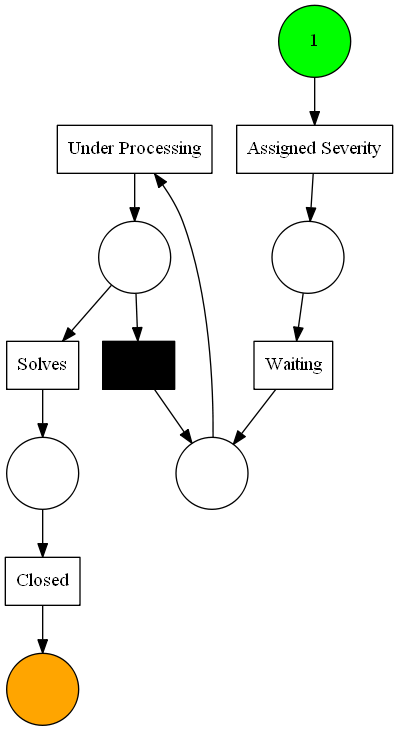

In [71]:
# Petri net visualization
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz_pn)

18.(c) Do the token replay conformance checking using your discovered model and the original event log. Does your process model fit?


In [72]:
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
print(token_replay_result[0])

{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [Assigned Severity, Waiting, Under Processing, Solves, Closed], 'reached_marking': ['sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 5, 'remaining_tokens': 0, 'produced_tokens': 5}


Your explanation: 
- Checking the token conformance replay, it is evident that the model fits well with the activated transitions of Assigned Severity->Waiting->Under Processing-> Solves->closed.
- Trace fits with trace fitness of 1.0 and there are no missing tokens.

18.(ci) Calculate the fitness of your model.

In [73]:
# Computing log fitness
fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking)
print(fitness_tokenbasedreplay)

{'perc_fit_traces': 82.55312986495782, 'average_trace_fitness': 0.9422531165900576, 'log_fitness': 0.9681466352032891}


18.(cii) Are there any deviations between the process model and the event log?

Your explanation:
- There is no significant deviations between the process model and event long as evident from log fitness of 96%

### Question 19 (Process Discovery and Conformance Checking using second filtered event log)
19.(a) Now use the original event log and remove the two most frequent traces, and discover the model based on your new event log(the filtered log without two most frequent traces).


In [74]:
filtered_log2 = variants_filter.apply(log, [max,max1], parameters={"positive": False})
print(len(filtered_log2))

# Mining for a process tree

tree = inductive_miner.apply_tree(filtered_log2)
net, initial_marking, final_marking = inductive_miner.apply(filtered_log2)

4819


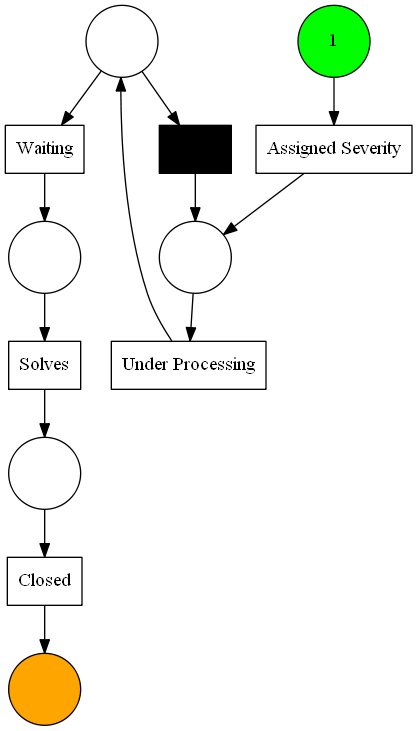

In [75]:
# Petri net visualization
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz_pn)

19.(b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [64]:
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
print(token_replay_result[0])

{'trace_is_fit': False, 'trace_fitness': 0.6400000000000001, 'activated_transitions': [Assigned Severity, Waiting, Under Processing, Solves, Closed], 'reached_marking': ['p_5:1', 'sink:1'], 'enabled_transitions_in_marking': {Waiting, Under Processing}, 'transitions_with_problems': [Waiting], 'missing_tokens': 1, 'consumed_tokens': 5, 'remaining_tokens': 1, 'produced_tokens': 5}


Your explanation:
- Checking the token conformance replay, it is evident that the model does not fits, with the activated transitions of Assigned Severity->Waiting->Under Processing-> Solves->closed. There is 1 missing tokens. The deviation has occurred on transition Waiting.
- trace fitness is 0.64 

19.(bi) Calculate the fitness of your model?

In [65]:
fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking)
print(fitness_tokenbasedreplay)

{'perc_fit_traces': 17.44687013504218, 'average_trace_fitness': 0.7237302535510584, 'log_fitness': 0.8492798455914916}


19.(bii)  Is there any deviation inside the process model?

Your explanation:
- There is a significant deviations between the process model and event long as evident from log fitness of 84%. There is a deviation that happened at the transition Waiting.

### Question 20 (Process Discovery using complete log)
20.(a) Use the complete event log (original event log) and discover your process model using inductive miner.


In [76]:
tree = inductive_miner.apply_tree(log)
net, initial_marking, final_marking = inductive_miner.apply(log)

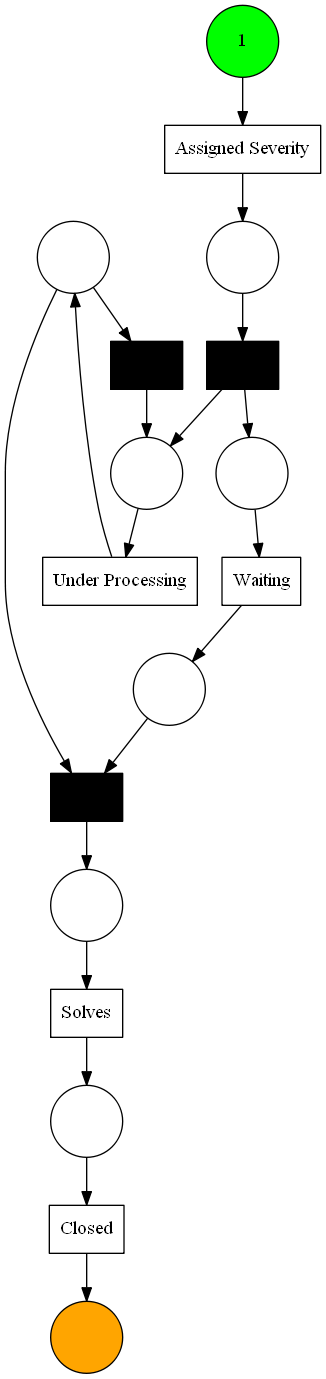

In [77]:
# Petri net visualization
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz_pn)

20.(b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [78]:
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
print(token_replay_result[0])

fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking)
print(fitness_tokenbasedreplay)

{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [Assigned Severity, tauSplit_1, Waiting, Under Processing, tauJoin_2, Solves, Closed], 'reached_marking': ['sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 5, 'remaining_tokens': 0, 'produced_tokens': 5}
{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0}


Your explanation: 
- Checking the token conformance replay, it is evident that the model fits, with the activated transitions of Assigned Severity->tau split1->Waiting->Under Processing-> tau split2-> Solves->closed. There are no missing tokens. 
- trace fitness is 1.0
- log fitness is also 1.0 

20.(c) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Your explanation:
- The first process model is without two least frequent traces. The model fits with a fitness of 96%. There is no deviation as well. The second process model is without two most frequent traces. The model does not fit and has a fitness of 84%. There is a deviation and a missing token as well. The third model is the original event log. It fits with a fitness of 100%.
- Best fitting will be the third model with a fitness of 100%. But considering that the same event log is used to train the model, it is obvious to have a high fitness score. Therefore may also be overfitting. So I think the model 1 with two least frequent traces removed is the better among model 1 and model 2.